In [2]:
#Step1 - Importing libraries

In [3]:
import pandas as pd
import seaborn as sb
df1 = pd.read_csv("zomato.csv",encoding='latin-1')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(12,6) #used for figure expansion for better view

In [4]:
df1.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [5]:
df2 = pd.read_excel("Country-Code.xlsx")

In [6]:
df2.head(2)

,Country Code,Country
0,1,India
1,14,Australia


In [7]:
#Step2 - merge dataframes according to the specific feature name:Country Code 

In [8]:
df = pd.merge(df1,df2,on="Country Code",how="left")

In [9]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [10]:
#Step3 - Checking null values and plotting the graph

In [11]:
[i for i in df.columns if df[i].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

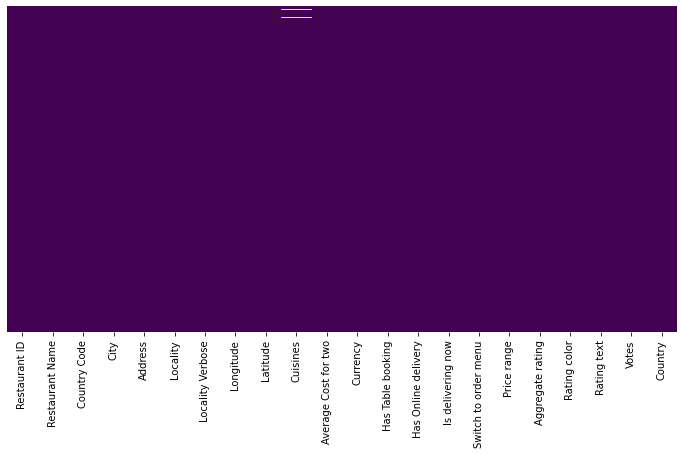

In [12]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [13]:
#Step4 - Checking value counts of Country features and visualising the distribution of the feature Country

In [14]:
a = df.Country.value_counts()
a

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [15]:
a.values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

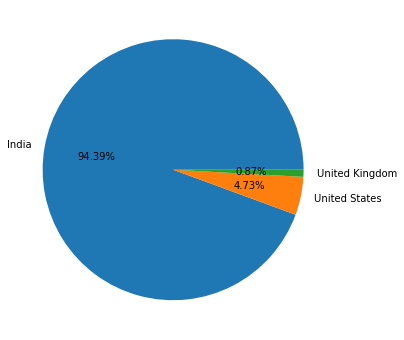

In [16]:
plt.pie(a.values[:3],labels=a.index[:3],autopct="%1.2f%%")
plt.show()

In [17]:
#Observation: 
# 1. Countries India,UK,USA have more number of ratings among other countries

In [18]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [19]:
#Step5 - Grouping the rating features to draw conclusion

In [20]:
b = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"Size Values"})

In [21]:
b

,Aggregate rating,Rating color,Rating text,Size Values
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<AxesSubplot:xlabel='Aggregate rating', ylabel='Size Values'>

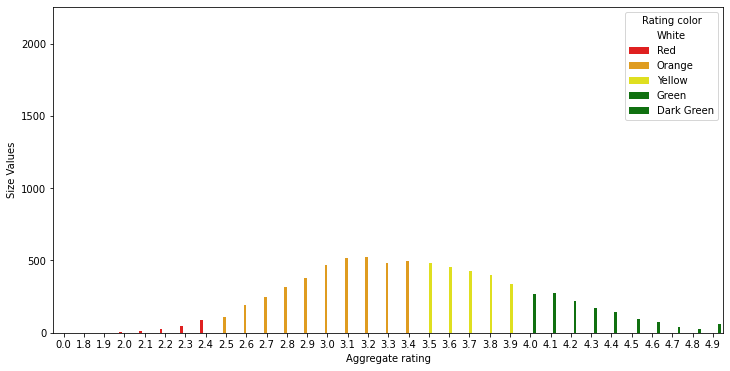

In [22]:
import seaborn as sb
sb.barplot(x="Aggregate rating",y="Size Values",data=b,hue="Rating color",palette=['white','red','orange','yellow','green','green'])

In [23]:
#Observation:

# 1. Customers are more who have not rated so the 0.0 value is high in count
# 2. From ratings 2.5 to 3.5 there is gradual increase in this range and maximum ratings are heree.

In [24]:
#Step6 - Checking which Country has more rating

In [25]:
c = df.groupby(['Aggregate rating','Country']).size().reset_index().rename(columns={0:"Counts"})
c

,Aggregate rating,Country,Counts
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


In [26]:
#Observation:
# 1. At rating 0.0 the Indian customers are more in number


<AxesSubplot:xlabel='Aggregate rating', ylabel='Counts'>

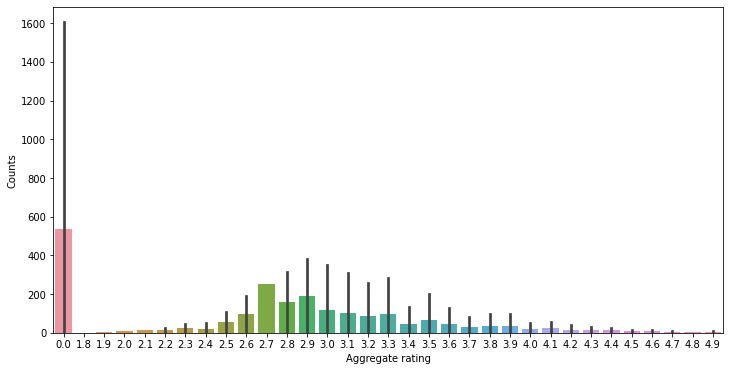

In [27]:
sb.barplot(y="Counts",x="Aggregate rating",data=c)

In [28]:
#Step7 - Checking which Country has online delivery access

In [29]:
d = df[df["Has Online delivery"]=="Yes"].Country.value_counts()

In [30]:
d

India    2423
UAE        28
Name: Country, dtype: int64

In [31]:
#Step8 - Checking which city has more orders

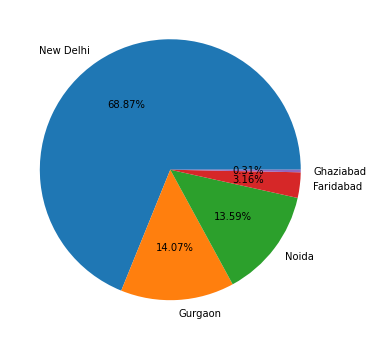

In [32]:
e = df.City.value_counts()

plt.pie(e.values[:5],labels=e.index[:5],autopct="%1.2f%%")
plt.show()

In [33]:
#Step9 - Presenting the Countries which has rating as 0.0

In [34]:
d = df[df["Rating color"]=="White"].Country.value_counts()

In [35]:
d

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [36]:
#Step10 - Checking Which country uses what type of Currency

In [37]:
g = df.groupby(["Country","Currency"]).size().reset_index().rename(columns={0:"Counts"})

In [38]:
g

,Country,Currency,Counts
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [39]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [41]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
